In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


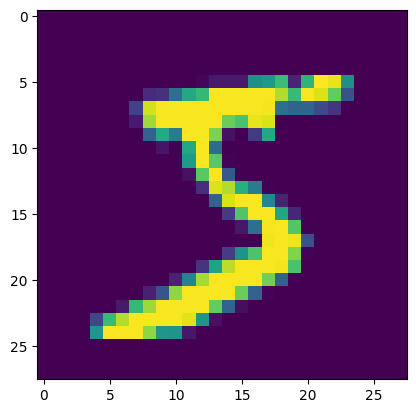

Label: 5


In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(f'Label: {y_train[0]}')

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential"

â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”³â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”³â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”“
â”ƒ Layer (type)                         â”ƒ Output Shape                â”ƒ         Param # â”ƒ
â”¡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â•‡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â•‡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”©
â”‚ conv2d (Conv2D)                      â”‚ (None, 26, 26, 32)          â”‚             320 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ max_pooling2d (MaxPooling2D)         â”‚ (None, 13, 13, 32)          â”‚               0 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ conv2d_1 (Conv2D)                    â”‚ (None, 11, 11, 64)          â”‚          18,496 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ max_pooling2d_1 (MaxPooling2D)       â”‚ (None, 5, 5, 64)            â”‚               0 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ flatten (Flatten)                    â”‚ (None, 1600)                â”‚               0 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ dropout (Dropout)                    â”‚ (None, 1600)                â”‚               0 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ dense (Dense)                        â”‚ (None, 10)                  â”‚          16,010 â”‚
â””â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”´â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”´â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”˜

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 7s 7ms/step - accuracy: 0.7513 - loss: 0.8029 - val_accuracy: 0.9695 - val_loss: 0.1007
Epoch 2/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 2s 5ms/step - accuracy: 0.9618 - loss: 0.1260 - val_accuracy: 0.9799 - val_loss: 0.0681
Epoch 3/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 4ms/step - accuracy: 0.9715 - loss: 0.0903 - val_accuracy: 0.9841 - val_loss: 0.0570
Epoch 4/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 2s 4ms/step - accuracy: 0.9772 - loss: 0.0753 - val_accuracy: 0.9859 - val_loss: 0.0484
Epoch 5/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 3s 4ms/step - accuracy: 0.9803 - loss: 0.0641 - val_accuracy: 0.9862 - val_loss: 0.0467
Epoch 6/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 3s 4ms/step - accuracy: 0.9821 - loss: 0.0559 - val_accuracy: 0.9860 - val_loss:

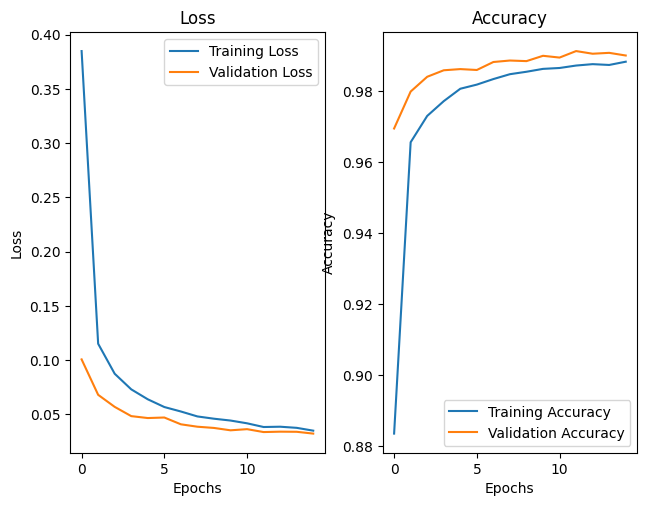

In [9]:
def plot_performance(history):
  fig, ax = plt.subplots(1,2)
  fig.tight_layout()
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training Loss')
  ax[0].plot(val_loss, label='Validation Loss')
  ax[0].legend()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training Accuracy')
  ax[1].plot(val_acc, label='Validation Accuracy')
  ax[1].legend()
  plt.show()

plot_performance(history)

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028314940631389618
Test accuracy: 0.9914000034332275


In [15]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.MaxPooling2D(pool_size=(28,28)),
        layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_smallest.summary()

Model: "sequential_2"

â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”³â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”³â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”“
â”ƒ Layer (type)                         â”ƒ Output Shape                â”ƒ         Param # â”ƒ
â”¡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â•‡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â•‡â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”©
â”‚ average_pooling2d (AveragePooling2D) â”‚ (None, 1, 1, 1)             â”‚               0 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ flatten_2 (Flatten)                  â”‚ (None, 1)                   â”‚               0 â”‚
â”œâ”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¼â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”¤
â”‚ dense_2 (Dense)                      â”‚ (None, 10)                  â”‚              20 â”‚
â””â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”´â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”´â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”˜

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_smallest.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 3s 6ms/step - accuracy: 0.1275 - loss: 2.2996 - val_accuracy: 0.1873 - val_loss: 2.2956
Epoch 2/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 3s 2ms/step - accuracy: 0.1764 - loss: 2.2933 - val_accuracy: 0.1718 - val_loss: 2.2914
Epoch 3/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 2ms/step - accuracy: 0.1729 - loss: 2.2887 - val_accuracy: 0.1721 - val_loss: 2.2874
Epoch 4/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 2ms/step - accuracy: 0.1756 - loss: 2.2845 - val_accuracy: 0.1749 - val_loss: 2.2835
Epoch 5/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 2ms/step - accuracy: 0.1790 - loss: 2.2805 - val_accuracy: 0.1768 - val_loss: 2.2797
Epoch 6/15
375/375 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 2ms/step - accuracy: 0.1814 - loss: 2.2766 - val_accuracy: 0.1781 - val_loss:

In [17]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.243715763092041
Test accuracy: 0.18889999389648438
